In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# impofg noise layer
from keras.layers import GaussianNoise
# define noise layer
layer = GaussianNoise(0.1)

In [24]:
# Gaussian Noise can be used in input, output, and hidden layers

# model.add(GaussianNoise(0.01, input_shape=(2,))) # input layer


# Gaussian Noise in Hidden layers

# model.add(Dense(32))
# model.add(GaussianNoise(0.1))
# model.add(Activation('relu'))
# model.add(Dense(32))

# Gaussian Noise in Output layer

# model.add(Dense(32, activation='reu'))
# model.add(GaussianNoise(0.1))
# model.add(Dense(32))


In [25]:
# CNN Noise Regulation

# example of noise for a CNN

from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GaussianNoise
...
model.add(Conv2D(32, (3,3)))
model.add(Conv2D(32, (3,3)))
model.add(MaxPooling2D())
model.add(GaussianNoise(0.1))
model.add(Dense(1))
...

ValueError: ignored

In [26]:
# RNN Drouput Regularization

# example of noise between LSTM and fully connected layers
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import LSTM
from keras.layers import GaussianNoise
...
model.add(LSTM(32))
model.add(GaussianNoise(0.5))
model.add(Activation('relu'))
model.add(Dense(1))
...



ValueError: ignored

In [27]:
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

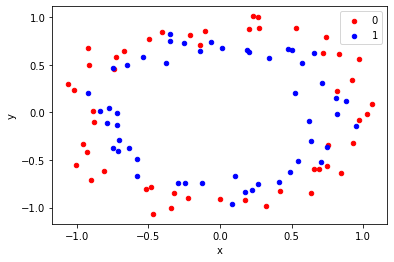

In [28]:

# generate two circles dataset
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()


In [29]:
# Overfit Multilayer Perceptron
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [30]:

# define model
from keras.layers import Activation, Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model, save_model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

In [32]:

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.771


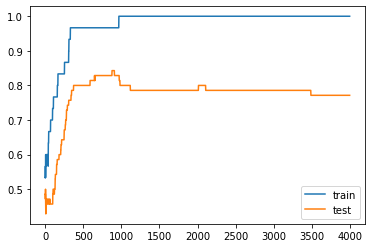

In [33]:

# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Train: 1.000, Test: 0.771


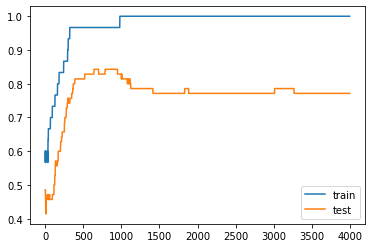

In [34]:

# mlp overfit on the two circles dataset
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[: n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [35]:
# MLP With Input Layer Noise
# define model
model = Sequential()
model.add(GaussianNoise(0.01, input_shape=(2,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Train: 1.000, Test: 0.771


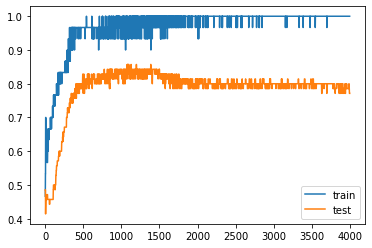

In [36]:

# mlp overfit on the two circles dataset with input noise
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GaussianNoise
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(GaussianNoise(0.01, input_shape=(2,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [37]:
# MLP With Hidden Layer Noise

# define model
model = Sequential()
model.add(Dense(500, input_dim=2))
model.add(GaussianNoise(0.1))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Train: 0.967, Test: 0.771


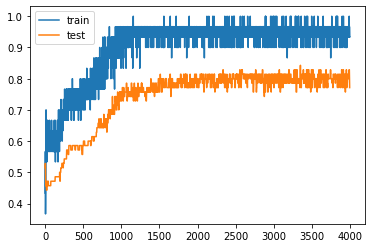

In [38]:

# mlp overfit on the two circles dataset with hidden layer noise
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import GaussianNoise
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2))
model.add(GaussianNoise(0.1))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [39]:

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(GaussianNoise(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Train: 0.967, Test: 0.857


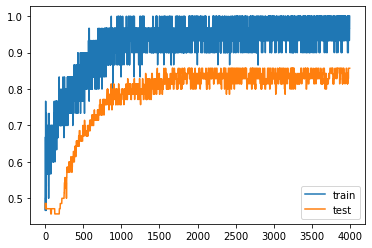

In [40]:

# mlp overfit on the two circles dataset with hidden layer noise (alternate)
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GaussianNoise
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(GaussianNoise(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()